<a href="https://colab.research.google.com/github/purnaswathimaddukuri/Assignment1/blob/master/drugstoresalesForecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd 
from pandas import datetime 

 #for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline    
# time series analysis
import numpy as np
import pandas as pd  
import datetime 
#for visualization
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA 
import statsmodels.api as sm
#For generating cartesian product
import itertools
#For ignoring warnings 
import warnings
warnings.filterwarnings('ignore') 
#for model creation
from sklearn import metrics 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score

# Mounting Drive

In [3]:
from google.colab import drive
drive.mount('/content/Prive', force_remount= True)

Mounted at /content/Prive


# Reading Dataset


In [9]:
train = pd.read_csv('/content/Prive/MyDrive/train.csv',parse_dates = True, index_col = 'Date')

In [10]:
train.head(10)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1
2015-07-31,6,5,5651,589,1,1,0,1
2015-07-31,7,5,15344,1414,1,1,0,1
2015-07-31,8,5,8492,833,1,1,0,1
2015-07-31,9,5,8565,687,1,1,0,1


In [11]:
state = pd.read_csv('/content/Prive/MyDrive/state.csv')

In [12]:
state.head(10)


,Store,State
0,1,HE
1,2,TH
2,3,NW
3,4,BE
4,5,SN
5,6,SN
6,7,SH
7,8,SH
8,9,NW
9,10,"HB,NI"


In [13]:
store = pd.read_csv('/content/Prive/MyDrive/store.csv')

In [14]:
store.head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


# Extraction of Data

In [15]:
train['Year'] = train.index.year 
train['Month'] = train.index.month
train['Day'] = train.index.day
# adding new variable 
train['SalePerCustomer'] = train['Sales']/train['Customers']

# Displaying Dataset

In [16]:
train.head()


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,SalePerCustomer
Date,,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7,31,9.482883
2015-07-31,2,5,6064,625,1,1,0,1,2015,7,31,9.702400
2015-07-31,3,5,8314,821,1,1,0,1,2015,7,31,10.126675
2015-07-31,4,5,13995,1498,1,1,0,1,2015,7,31,9.342457
2015-07-31,5,5,4822,559,1,1,0,1,2015,7,31,8.626118


In [17]:
state.head()

,Store,State
0,1,HE
1,2,TH
2,3,NW
3,4,BE
4,5,SN


In [18]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


# Data Description

In [19]:
store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [20]:
train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,SalePerCustomer
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,844340.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,2.013832e+03,5.846762e+00,1.570279e+01,9.493619
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.773960e-01,3.326097e+00,8.787638e+00,2.197494
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00,0.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,3.000000e+00,8.000000e+00,7.895563
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.014000e+03,6.000000e+00,1.600000e+01,9.250000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,2.014000e+03,8.000000e+00,2.300000e+01,10.899729
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,2.015000e+03,1.200000e+01,3.100000e+01,64.957854


In [21]:
state.describe()

,Store
count,1115.00000
mean,558.00000
std,322.01708
min,1.00000
25%,279.50000
50%,558.00000
75%,836.50000
max,1115.00000


# Checking null values

In [22]:
train.isnull().sum()

Store                   0
DayOfWeek               0
Sales                   0
Customers               0
Open                    0
Promo                   0
StateHoliday            0
SchoolHoliday           0
Year                    0
Month                   0
Day                     0
SalePerCustomer    172869
dtype: int64

In [23]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [24]:
store['StoreType'].value_counts()

a    602
d    348
c    148
b     17
Name: StoreType, dtype: int64

In [25]:
state.isnull().sum()

Store    0
State    0
dtype: int64

# Filling Missing Values

In [26]:
train[(train.Open == 0) & (train.Sales == 0)].head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,SalePerCustomer
Date,,,,,,,,,,,,
2015-07-31,292,5,0,0,0,1,0,1,2015,7,31,NaN
2015-07-31,876,5,0,0,0,1,0,1,2015,7,31,NaN
2015-07-30,292,4,0,0,0,1,0,1,2015,7,30,NaN
2015-07-30,876,4,0,0,0,1,0,1,2015,7,30,NaN
2015-07-29,292,3,0,0,0,1,0,1,2015,7,29,NaN


In [27]:
train[(train.Open != 0) & (train.Sales == 0)].head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,SalePerCustomer
Date,,,,,,,,,,,,
2015-05-15,971,5,0,0,1,0,0,1,2015,5,15,NaN
2015-03-26,674,4,0,0,1,0,0,0,2015,3,26,NaN
2015-02-05,699,4,0,0,1,1,0,0,2015,2,5,NaN
2014-10-01,708,3,0,0,1,1,0,0,2014,10,1,NaN
2014-09-22,357,1,0,0,1,0,0,0,2014,9,22,NaN


In [28]:
train = train[(train["Open"] != 0) & (train["Sales"] != 0)]

In [29]:
train.isnull().sum()

Store              0
DayOfWeek          0
Sales              0
Customers          0
Open               0
Promo              0
StateHoliday       0
SchoolHoliday      0
Year               0
Month              0
Day                0
SalePerCustomer    0
dtype: int64

In [30]:
store[pd.isnull(store.CompetitionDistance)]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [31]:
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(), inplace = True)

In [ ]:
store.loc[290]

Store                         291
StoreType                       d
Assortment                      a
CompetitionDistance          2325
CompetitionOpenSinceMonth     NaN
CompetitionOpenSinceYear      NaN
Promo2                          0
Promo2SinceWeek               NaN
Promo2SinceYear               NaN
PromoInterval                 NaN
Name: 290, dtype: object

In [32]:
store.loc[621]

Store                         622
StoreType                       a
Assortment                      c
CompetitionDistance          2325
CompetitionOpenSinceMonth     NaN
CompetitionOpenSinceYear      NaN
Promo2                          0
Promo2SinceWeek               NaN
Promo2SinceYear               NaN
PromoInterval                 NaN
Name: 621, dtype: object

In [33]:
store.loc[878]

Store                                    879
StoreType                                  d
Assortment                                 a
CompetitionDistance                     2325
CompetitionOpenSinceMonth                NaN
CompetitionOpenSinceYear                 NaN
Promo2                                     1
Promo2SinceWeek                            5
Promo2SinceYear                         2013
PromoInterval                Feb,May,Aug,Nov
Name: 878, dtype: object

In [34]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
store.fillna(0, inplace = True)

In [35]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

# Merging Two datasets store and train

In [36]:
train_store = pd.merge(train, store, how = 'inner', on = 'Store')

In [37]:
train_store_state = pd.merge(train_store, state, how = 'inner', on = 'Store')

In [38]:
train_store_state.shape

(844338, 22)

In [40]:
train_store_state.head(10)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,SalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,State
0,1,5,5263,555,1,1,0,1,2015,7,31,9.482883,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,HE
1,1,4,5020,546,1,1,0,1,2015,7,30,9.194139,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,HE
2,1,3,4782,523,1,1,0,1,2015,7,29,9.143403,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,HE
3,1,2,5011,560,1,1,0,1,2015,7,28,8.948214,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,HE
4,1,1,6102,612,1,1,0,1,2015,7,27,9.970588,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,HE
5,1,6,4364,500,1,0,0,0,2015,7,25,8.728000,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,HE
6,1,5,3706,459,1,0,0,0,2015,7,24,8.074074,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,HE
7,1,4,3769,503,1,0,0,0,2015,7,23,7.493042,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,HE
8,1,3,3464,463,1,0,0,0,2015,7,22,7.481641,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,HE
9,1,2,3558,469,1,0,0,0,2015,7,21,7.586354,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,HE


In [41]:
train_store_state.iloc[915:930]

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,SalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,State
915,2,4,5842,627,1,1,0,0,2015,2,19,9.317384,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",TH
916,2,3,6178,758,1,1,0,0,2015,2,18,8.150396,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",TH
917,2,2,6113,623,1,1,0,0,2015,2,17,9.812199,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",TH
918,2,1,7478,703,1,1,0,0,2015,2,16,10.637269,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",TH
919,2,6,2809,351,1,0,0,0,2015,2,14,8.002849,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",TH
920,2,5,3647,499,1,0,0,0,2015,2,13,7.308617,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",TH
921,2,4,3765,485,1,0,0,0,2015,2,12,7.762887,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",TH
922,2,3,4773,641,1,0,0,0,2015,2,11,7.446178,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",TH
923,2,2,4653,567,1,0,0,0,2015,2,10,8.206349,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",TH
924,2,1,3678,491,1,0,0,0,2015,2,9,7.490835,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",TH


In [42]:
train_store_state.groupby('StoreType')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
a,457042.0,6925.697986,3277.351589,46.0,4695.25,6285.0,8406.00,41551.0
b,15560.0,10233.380141,5155.729868,1252.0,6345.75,9130.0,13184.25,38722.0
c,112968.0,6933.126425,2896.958579,133.0,4916.00,6408.0,8349.25,31448.0
d,258768.0,6822.300064,2556.401455,538.0,5050.00,6395.0,8123.25,38037.0


In [43]:
train_store_state.groupby('StoreType')['Customers'].sum()

StoreType
a    363541431
b     31465616
c     92129705
d    156904995
Name: Customers, dtype: int64

# Correalation

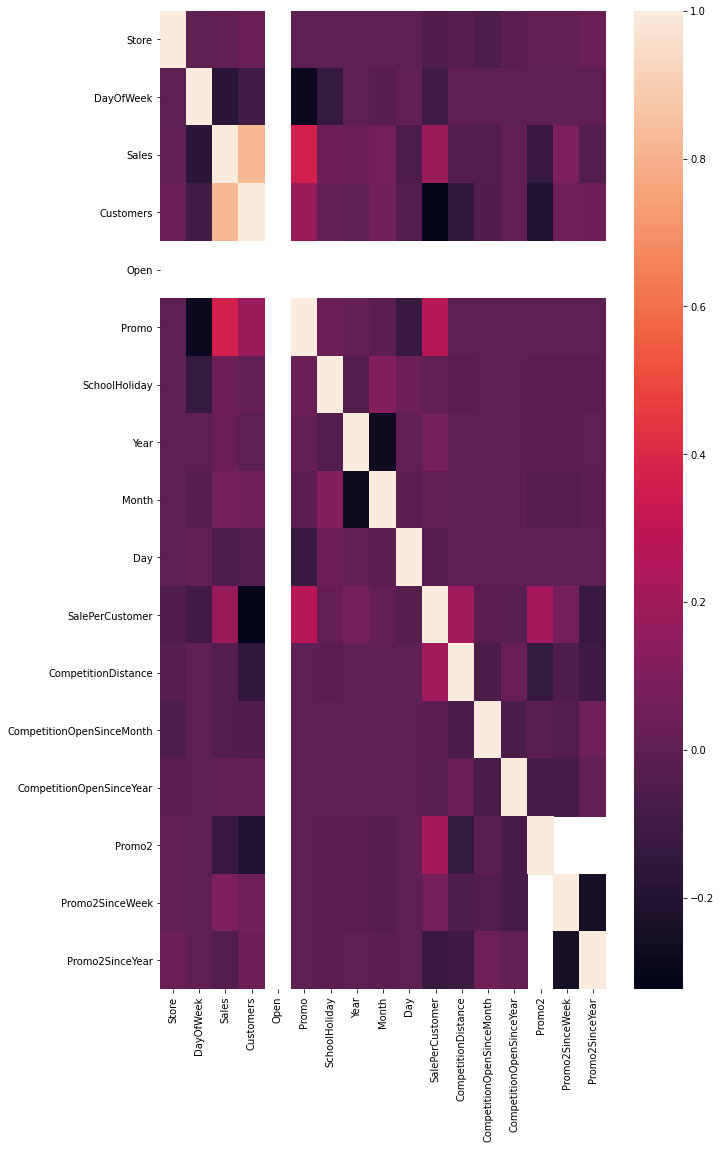

In [44]:
plt.figure(figsize = (10,18))
sns.heatmap(train_store.corr())

# Plots

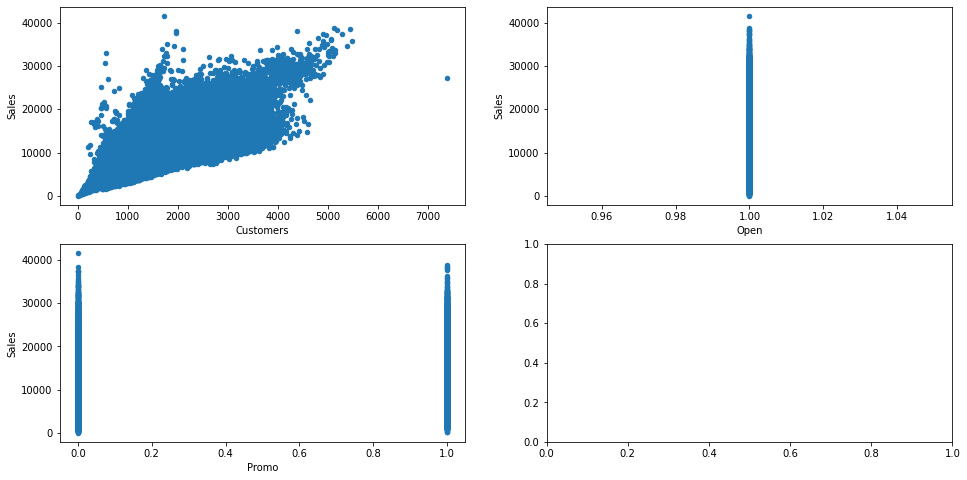

In [45]:
fig,ax=plt.subplots(2,2)
train_store_state.plot(kind='scatter',x='Customers',y='Sales',ax=ax[0][0],figsize=(16,8)) 
train_store_state.plot(kind='scatter',x='Open',y='Sales',ax=ax[0][1]) 
train_store_state.plot(kind='scatter',x='Promo',y='Sales',ax=ax[1][0])
plt.show()

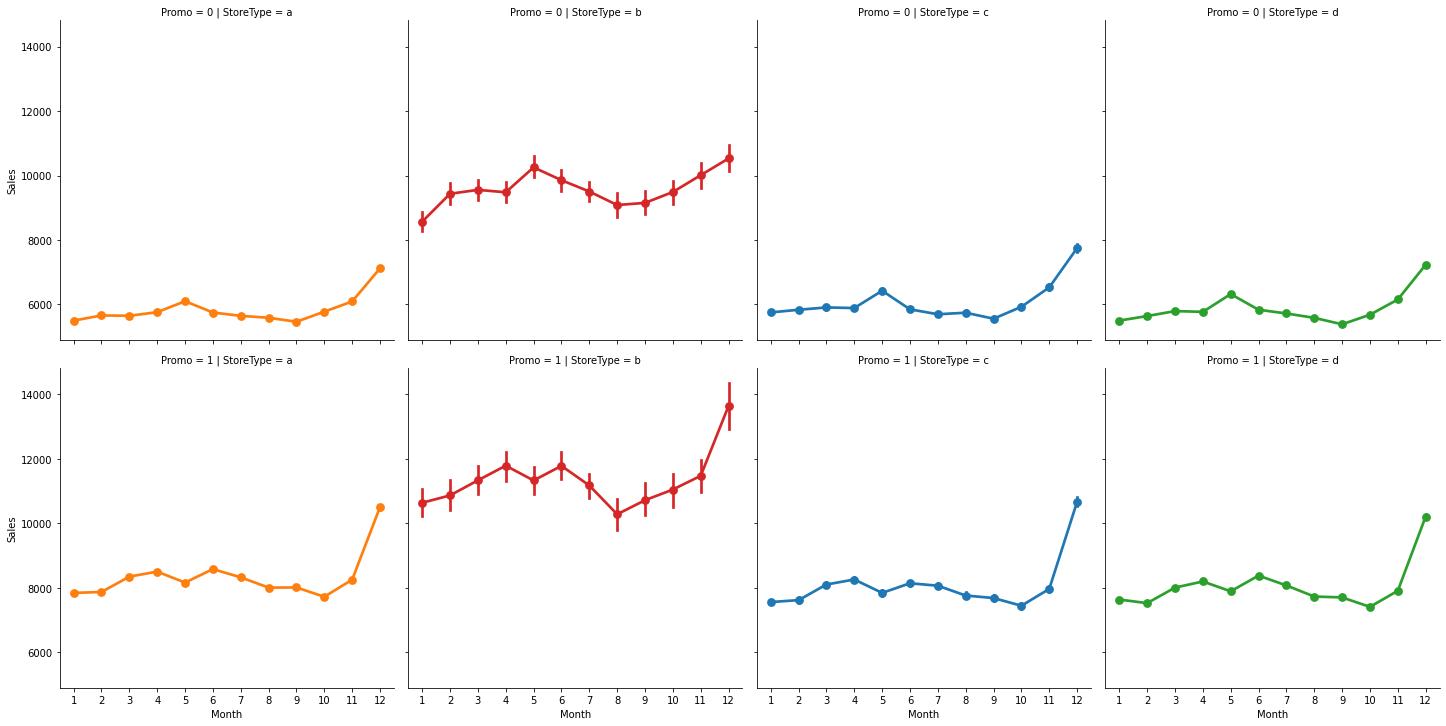

In [46]:
#Sales with promotion and without promotion at different months 
sns.factorplot(data = train_store_state, x = 'Month', y = "Sales", hue = 'StoreType',
col = 'StoreType',
# per store type in cols 
row = 'Promo', 
# per promo in the store in rows 
col_order = ['a','b','c','d'])

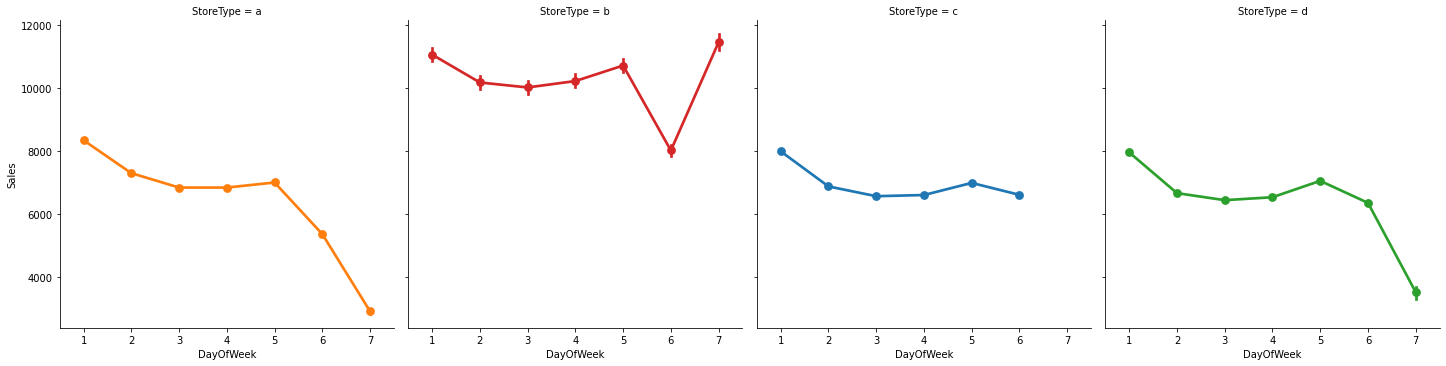

In [ ]:
# Sales at different DayOfWeek 
sns.factorplot(data = train_store_state, x = 'DayOfWeek', y = "Sales",
               hue = 'StoreType',
               col = 'StoreType', 
# per store type in cols
col_order = ['a','b','c','d'] )
 # Observation : on 7th i.e weekend day the sales in decreasing in a,c and d but not in store of type b


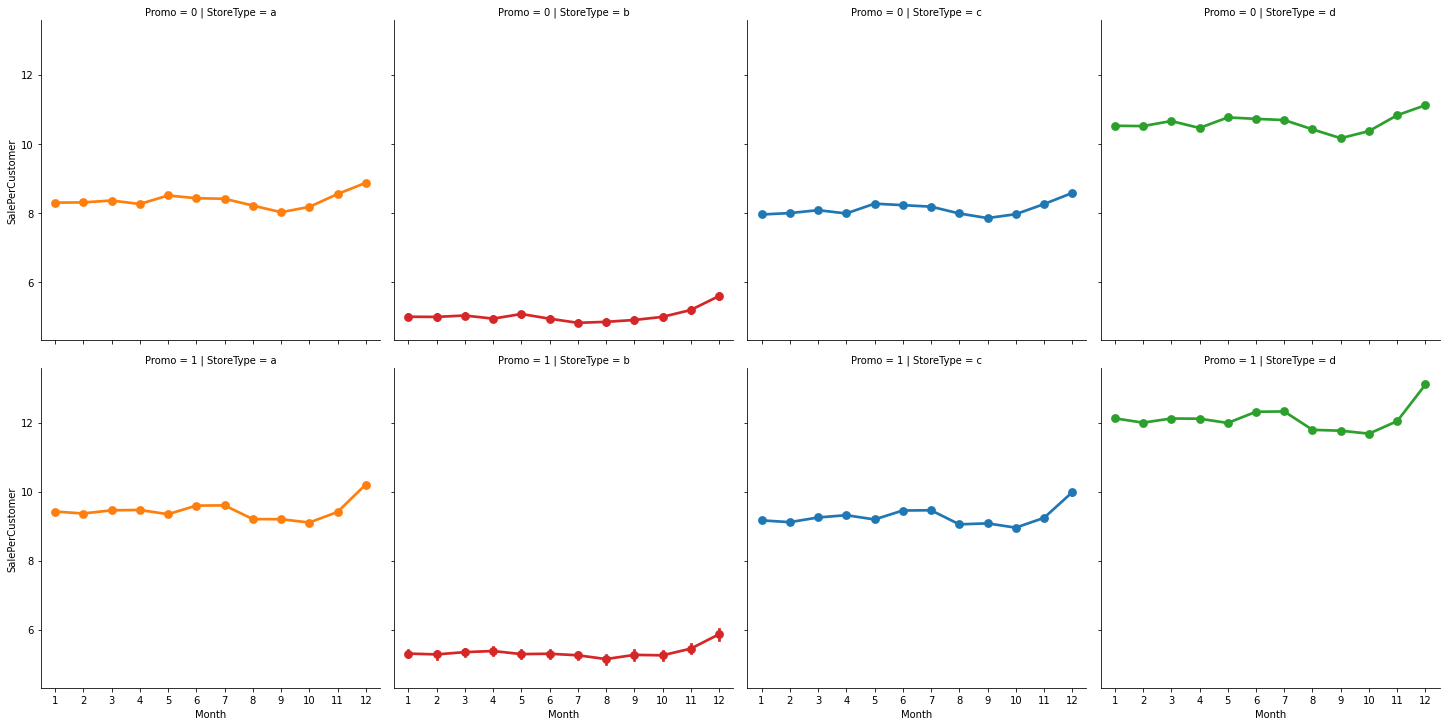

In [ ]:
#On an avreage SalePerCustomer of each month 
sns.factorplot(data = train_store_state, x = 'Month', y = 'SalePerCustomer',
               hue = 'StoreType', 
               col = 'StoreType', # per store type in cols 
               row = 'Promo', # per promo in the store in rows 
               col_order = ['a','b','c','d'] ) 
# Observation : Even though the sales and the no.of customers visiting StoreType b are more but the SalesPerCustomer is very less when compare to others. 
# Means these are like retail shops.

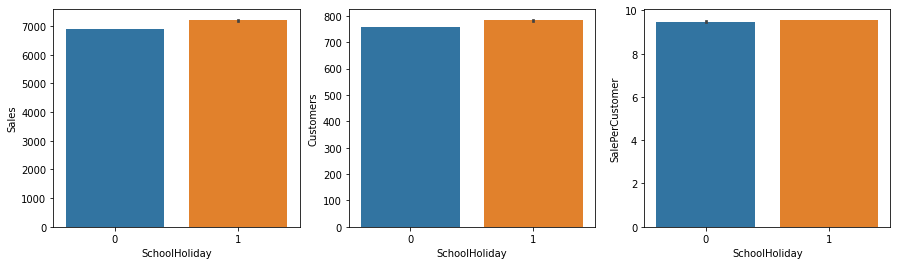

In [47]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,4))
sns.barplot(x='SchoolHoliday', y='Sales', data=train_store_state, ax=axis1) 
sns.barplot(x='SchoolHoliday', y='Customers', data=train_store_state, ax=axis2) 
sns.barplot(x='SchoolHoliday',y='SalePerCustomer',data=train_store_state,ax=axis3)
# Observation : Sales,Customers,SalePerCustomer are high when there is school holiday compared to workingdays

In [ ]:
train_store_state['StateHoliday'] = train_store_state.StateHoliday.astype(str)

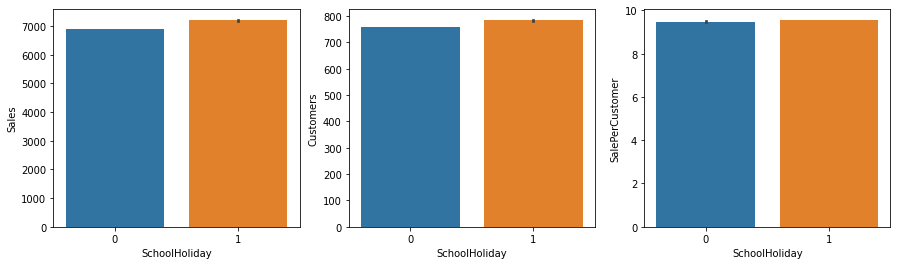

In [ ]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,4))
sns.barplot(x='SchoolHoliday', y='Sales', data=train_store_state, ax=axis1) 
sns.barplot(x='SchoolHoliday', y='Customers', data=train_store_state, ax=axis2) 
sns.barplot(x='SchoolHoliday',y='SalePerCustomer',data=train_store_state,ax=axis3)
# Observation : Sales,Customers,SalePerCustomer are high when there is school holiday compared to workingdays
# a b c are public and festival  holidays

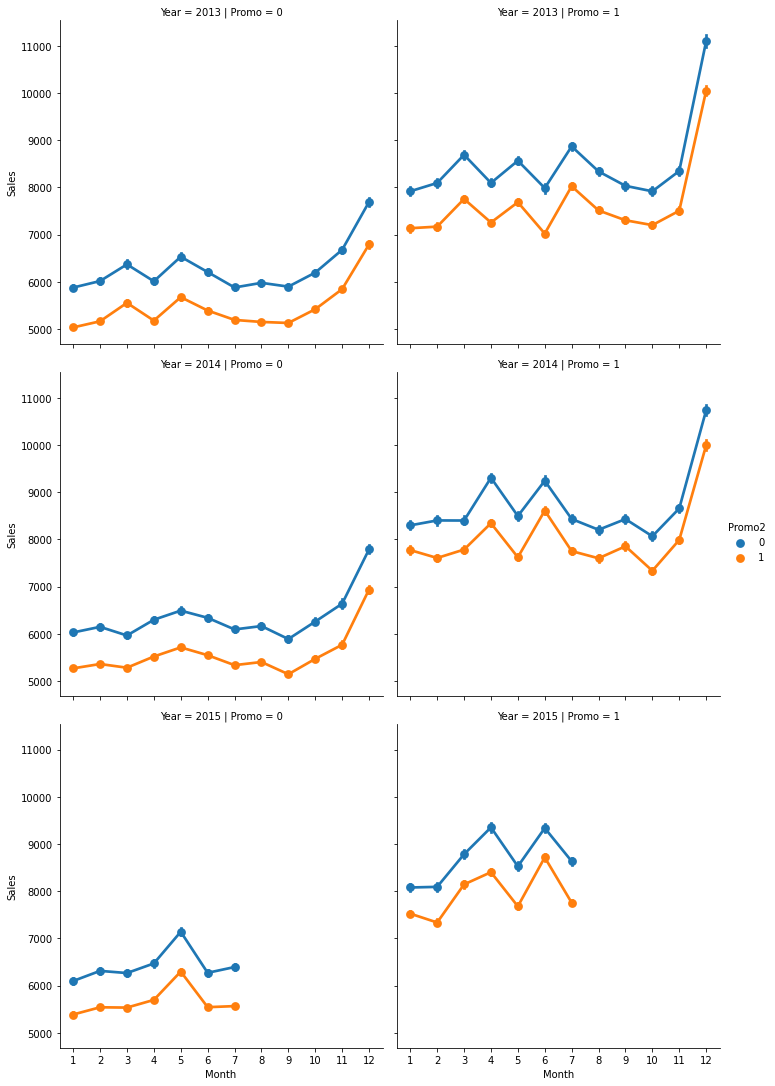

In [ ]:
# Sales trend over the months and year 
sns.factorplot(data = train_store_state, x ='Month', y = 'Sales', 
               col = 'Promo', # per store type in cols
               hue = 'Promo2',
               row = 'Year')
# Observation : Sales tend to spike in December, which makes sense because of the Christmas and holiday season.So, this confirms that the sales vary with the ‘Date’ (time) and there is a seasonality factor present in our data.

# Checking stationarity


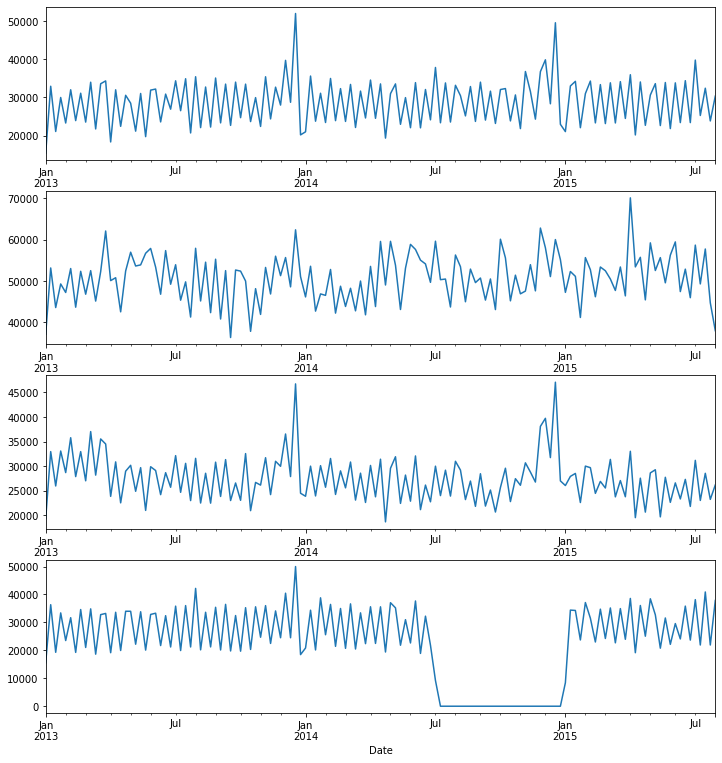

In [49]:
# preparation: input should be float type
train['Sales'] = train['Sales'] * 1.0
# store types 
sales_a = train[train.Store == 2]['Sales']
sales_b = train[train.Store == 85]['Sales'].sort_index(ascending = True) # sort the reverse order 
sales_c = train[train.Store == 1]['Sales']
sales_d = train[train.Store == 13]['Sales'] 
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize = (12, 13))
# store types resampling form days to weeks to see tends more clearly 
sales_a.resample('W').sum().plot(ax = ax1) 
sales_b.resample('W').sum().plot(ax = ax2) 
sales_c.resample('W').sum().plot(ax = ax3) 
sales_d.resample('W').sum().plot(ax = ax4)

# Augmented Dickey-Fuller test

In [50]:
print('Results of Dickey-Fuller Test:') 
result = adfuller(sales_a, autolag='AIC') 
print('ADF Statistic: %f' % result[0]) 
print('p-value: %f' % result[1])
print('Critical Values:') 
for key, value in result[4].items(): 
  print(key, value)

Results of Dickey-Fuller Test:
ADF Statistic: -5.292708
p-value: 0.000006
Critical Values:
1% -3.438915730045254
5% -2.8653205426302253
10% -2.5687831424305845


In [51]:
print('Results of Dickey-Fuller Test:') 
result = adfuller(sales_b, autolag='AIC') 
print('ADF Statistic: %f' % result[0]) 
print('p-value: %f' % result[1])
print('Critical Values:') 
for key, value in result[4].items(): 
  print(key, value)

Results of Dickey-Fuller Test:
ADF Statistic: -5.660918
p-value: 0.000001
Critical Values:
1% -3.437485646962348
5% -2.8646901138095378
10% -2.568447319459459


In [52]:
print('Results of Dickey-Fuller Test:') 
result = adfuller(sales_c, autolag='AIC') 
print('ADF Statistic: %f' % result[0]) 
print('p-value: %f' % result[1])
print('Critical Values:') 
for key, value in result[4].items(): 
  print(key, value)

Results of Dickey-Fuller Test:
ADF Statistic: -5.412786
p-value: 0.000003
Critical Values:
1% -3.4389045244994096
5% -2.8653156040031176
10% -2.5687805115003


In [53]:
print('Results of Dickey-Fuller Test:') 
result = adfuller(sales_d, autolag='AIC') 
print('ADF Statistic: %f' % result[0]) 
print('p-value: %f' % result[1])
print('Critical Values:') 
for key, value in result[4].items(): 
  print(key, value)

Results of Dickey-Fuller Test:
ADF Statistic: -6.321001
p-value: 0.000000
Critical Values:
1% -3.4411511898545206
5% -2.866305414688104
10% -2.569307861950312


#Auto Correalation & Partial Auto Correalation

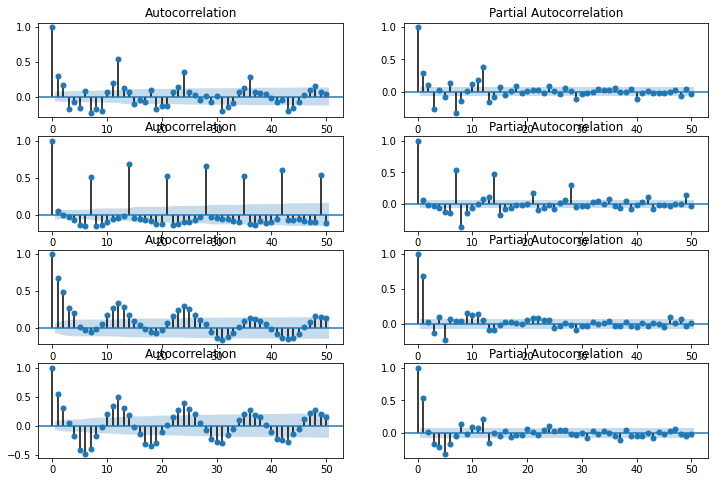

In [55]:
# figure for subplots
plt.figure(figsize = (12, 8))
 
# acf and pacf for A
plt.subplot(4,2,1) # four rows, each row 2 columns, and the position of this graph 
plot_acf(sales_a, lags = 50, ax = plt.gca())
plt.subplot(4,2,2)
plot_pacf(sales_a, lags = 50, ax = plt.gca())
# acf and pacf for B
plt.subplot(4,2,3) 
plot_acf(sales_b, lags = 50, ax = plt.gca())
plt.subplot(4,2,4)
plot_pacf(sales_b, lags = 50, ax = plt.gca())

# acf and pacf for C
plt.subplot(4,2,5)
plot_acf(sales_c, lags = 50, ax = plt.gca())
plt.subplot(4,2,6)
plot_pacf(sales_c, lags = 50, ax = plt.gca())
# acf and pacf for D
plt.subplot(4,2,7)
plot_acf(sales_d, lags = 50, ax = plt.gca())
plt.subplot(4,2,8)
plot_pacf(sales_d, lags = 50, ax = plt.gca())

plt.show()

In [59]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q)) 
#computes the cartesian product of input iterables i.e all possibe combinatios of p, d, q between 0 and 2
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [60]:
seasonal_pdq = [(x[0], x[1], x[2], 12)
for x in pdq]
# For seasonal parameters P, D, Q 
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [62]:
train = pd.read_csv("/content/Prive/MyDrive/train.csv",parse_dates = True, index_col = 'Date') 
y = train['Sales'].resample('W').mean() 
y.shape

(135,)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
# Determing p,d,q combinations with AIC scores.
for param in pdq:
   for param_seasonal in seasonal_pdq:
      model = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False) 
      results = model.fit() 
      
      print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))

In [ ]:
import warnings
warnings.filterwarnings('ignore')
# Fitting the data to ARIMA model 
model_sarima = sm.tsa.statespace.SARIMAX(y, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
results_sarima = model_sarima.fit()
print(results_sarima.summary().tables[1])

In [ ]:
results_sarima.plot_diagnostics(figsize=(15, 12))
plt.show()

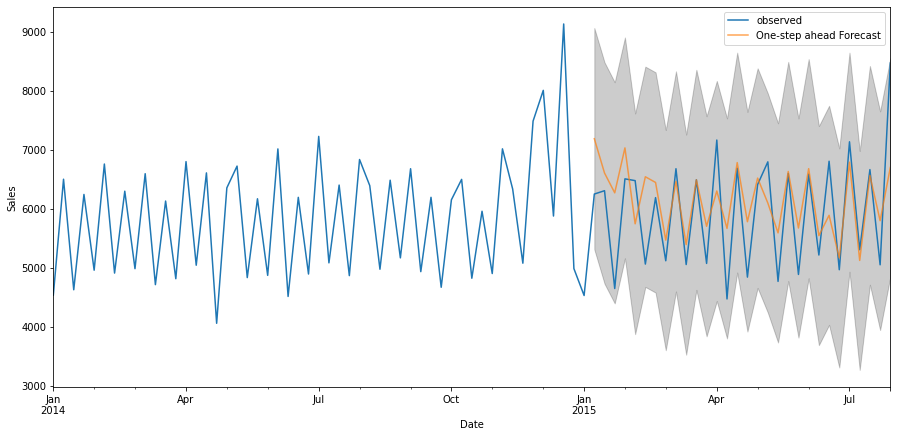

In [68]:
# Model Prediction
pred = results.get_prediction(start=pd.to_datetime('2015-01-11'), dynamic=False)
# Predictions are performed for the 11th Jan 2015 onwards of the train data. 
#The dynamic=False argument ensures that forecasts at each point are generated using the full history up to that point.
pred_ci = pred.conf_int()
# Get confidence intervals of forecasts 
ax = y['2014':].plot(label='observed',figsize=(15, 7))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], 
pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Sales') 
plt.legend()
plt.show()

In [70]:
# Get forecast 6 steps i.e 6 weeks ahead in future
pred_uc = results.get_forecast(steps=6) 
# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

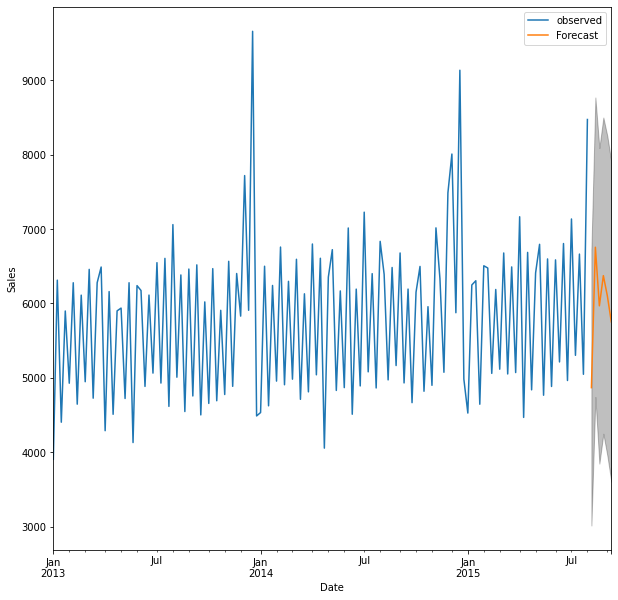

In [75]:
ax = y.plot(label='observed', figsize=(10, 10))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()